In [1]:
import FinanceDataReader as fdr

In [5]:
samsung_2019 = fdr.DataReader('005930','2019-01-01', '2019-12-31')
samsung_2019

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774
...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929
2019-12-24,55600,55700,54800,55000,11868463,-0.009009
2019-12-26,54700,55400,54400,55400,9645034,0.007273


In [6]:
samsung_2019.columns = ['open','high','low','close', 'volume', 'change']
samsung_2019

,open,high,low,close,volume,change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774
...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929
2019-12-24,55600,55700,54800,55000,11868463,-0.009009
2019-12-26,54700,55400,54400,55400,9645034,0.007273


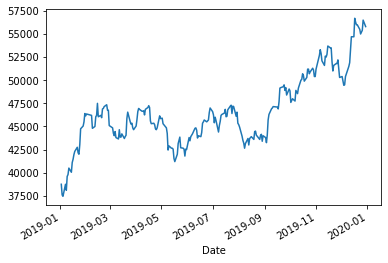

In [8]:
samsung_2019['close'].plot()

In [11]:
kospi = fdr.DataReader('KS11', '2019-01-01', '2019-12-31')
kospi.columns =['open','high','low','close', 'volume', 'change']
kospi.head()

,open,high,low,close,volume,change
Date,,,,,,
2019-01-02,2010.00,2050.55,2053.45,2004.27,326370000.0,-0.0152
2019-01-03,1993.70,2011.81,2014.72,1991.65,427980000.0,-0.0081
2019-01-04,2010.25,1992.40,2011.56,1984.53,408990000.0,0.0083
2019-01-07,2037.10,2034.24,2048.06,2030.90,440190000.0,0.0134
2019-01-08,2025.27,2038.68,2042.70,2023.59,397830000.0,-0.0058


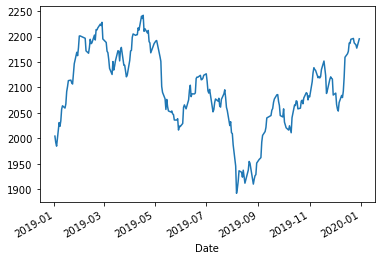

In [12]:
kospi['close'].plot()

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [16]:
def minmaxscaled(df):
    scaler = MinMaxScaler()
    scale_cols =['close']
    samsung_2019_scaled = scaler.fit_transform(samsung_2019[scale_cols])
    
    samsung_2019_scaled = pd.DataFrame(samsung_2019_scaled)
    samsung_2019_scaled.columns = scale_cols
    return samsung_2019_scaled

In [18]:
# 스케일링
kospi_scaled = minmaxscaled(kospi)
samsung_2019_scaled = minmaxscaled(samsung_2019)

In [19]:
data = {
    'kospi' : kospi_scaled['close']
    ,'samsung_scaled' : samsung_2019_scaled['close']
}
corr_samsung_2019 = pd.DataFrame(data)
corr_samsung_2019.corr()

,kospi,samsung_scaled
kospi,1.0,1.0
samsung_scaled,1.0,1.0


In [104]:

import talib.abstract as ta
# 기간별 삼성전자 종가 이동평균 계산
samsung_2019['ma5'] = ta.MA(samsung_2019, timeperiod=5)
samsung_2019['ma10'] = ta.MA(samsung_2019, timeperiod=10)
samsung_2019['ma20'] = ta.MA(samsung_2019, timeperiod=20)
samsung_2019['ma60'] = ta.MA(samsung_2019, timeperiod=60)
samsung_2019['ma120'] = ta.MA(samsung_2019, timeperiod=120)


In [105]:
# 볼린저 밴드
samsung_2019['upperband'], samsung_2019['middleband'], samsung_2019['lowerband'] = \
ta.BBANDS(samsung_2019.close)



In [24]:
samsung_2019

,open,high,low,close,volume,change,ma5,ma10,ma20,ma60,ma120,upperband,middleband,lowerband
Date,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,38000,38900,37800,38750,12748997,0.034713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38130.0,NaN,NaN,NaN,NaN,39230.181803,38130.0,37029.818197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929,56100.0,54660.0,52652.5,51485.000000,48560.416667,56889.936706,56100.0,55310.063294
2019-12-24,55600,55700,54800,55000,11868463,-0.009009,55760.0,55010.0,52812.5,51595.000000,48633.333333,56677.387595,55760.0,54842.612405
2019-12-26,54700,55400,54400,55400,9645034,0.007273,55580.0,55360.0,52972.5,51700.833333,48716.666667,56343.151361,55580.0,54816.848639


In [97]:
import matplotlib.pyplot as plt
# 볼린저밴드 수식 직접 # 볼린저밴드는 이동평균값 쁠마 표준편차 상위를 ubb/ 중간 mbb/ 하위 lbb
# x는 종가 series
# +- 2시그마 
def bb(x, w=20, k=2): # 20일 이동평균 k 는시그마 / 볼린저 밴드 넓이에 영향을 줌 
    """
    Calculate Bpllinger Bands
    ubb = MA_w(x) + k*sd(x)
    mbb = MA_w(x)
    lbb = MA_w(x) - k*sd(x)
    :param x:
    :return: (ubb,mbb,lbb)
    """
    
    x=pd.Series(x)
    mbb = x.rolling(w).mean()
    ubb = mbb + k * x.rolling(w).std()
    lbb = mbb - k * x.rolling(w).std()
    ubb.plot(x='Date', y='UBB')
    mbb.plot(x='Date', y='MBB')
    lbb.plot(x='Date', y='LBB')
    samsung_2019['close'].plot(color='pink', linewidth=1.5, linestyle=':')
    plt.show()

## 주가의 95% 이상은 볼린저밴드의 상한선과 하한선 사이에서 움직인다
- 가격의 등락폭이 적은 상황에서는 밴드의 상-하한선 폭도 축소된다. 이떄에는 조만각 가격의 변동성이 커질 가능성이 높다
- 반면, 각격의 등락폭이 큰 상황에서는 밴드의 상-하한선 폭이 확대된다. 이떄에는 본격적인 추세전환이 이루어질 가능성이 높다
- 가격이 볼린저 밴드 상-하한선을 돌파했을 경우, 현재 주가가 과대 혹은 과소평가 된 상황이므로, 추세가 반전될 확률이 높다. 

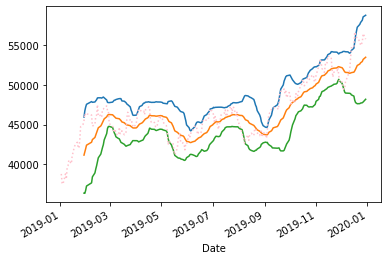

In [99]:
bb(samsung_2019['close'])


In [53]:
ad = ta.AD(samsung_2019['high'],samsung_2019['low'],samsung_2019['close'],samsung_2019['volume'])
samsung_2019['ad'] =ad

samsung_2019

,open,high,low,close,volume,change,ma5,ma10,ma20,ma60,ma120,upperband,middleband,lowerband,ad,rsi14
Date,,,,,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.154646e+06,NaN
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.322482e+07,NaN
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.759448e+06,NaN
2019-01-07,38000,38900,37800,38750,12748997,0.034713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.512550e+06,NaN
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,38130.0,NaN,NaN,NaN,NaN,39230.181803,38130.0,37029.818197,-5.182431e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929,56100.0,54660.0,52652.5,51485.000000,48560.416667,56889.936706,56100.0,55310.063294,2.174952e+08,65.680175
2019-12-24,55600,55700,54800,55000,11868463,-0.009009,55760.0,55010.0,52812.5,51595.000000,48633.333333,56677.387595,55760.0,54842.612405,2.109016e+08,61.669482
2019-12-26,54700,55400,54400,55400,9645034,0.007273,55580.0,55360.0,52972.5,51700.833333,48716.666667,56343.151361,55580.0,54816.848639,2.205467e+08,63.585226


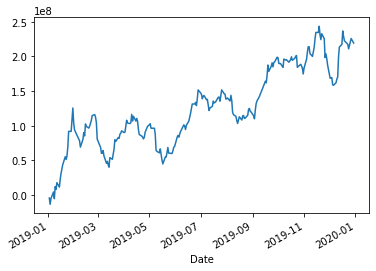

In [55]:
import matplotlib.pyplot as plt
# ad line indicator 주가 변동이 있을때 많은 거래량을 수반한다면 중요한 의미가 있을것이라고 예상
# 따라서 주가와 거래량의 변화를 나타내는 운동량 지표 
#    """
#    Calculate Accumulation/ Distribution Line indicator 
#    daily A/D = {(close - low) - (high - close)/ (high-low)} * volume
#    """
samsung_2019['ad'].plot()


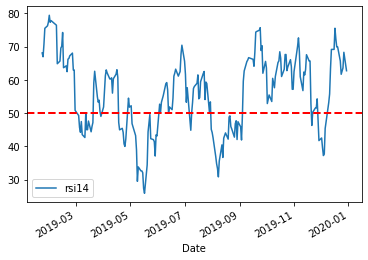

In [64]:
rsi14 = ta.RSI((samsung_2019['close']),14) # relative Strength index 
# 가격의 상승압력과 하락 압력간의 상대적인 강도를 나타내는 지표 
# rsi 가 클수록 주가의 상승추세가 크다는 뜻 
# 작을수록 주가의 하락 추세가 크다는 뜻 
samsung_2019['rsi14'] = rsi14
samsung_2019['rsi14'].plot()
plt.axhline(y=50, color='r', linewidth=2, linestyle='--')
plt.legend()

# 50% 를 기준으로 50% 이상은 매수세 우세, 50% 이하는 매도세 우세
# 70% 이상이면 매수세가 상당히 커서 초과매수 국면에 돌입
# 30% 이하이면 매도세가 상당히 커서 초과매도 국면에 돌입 

In [59]:
# macd 는 이동평균수렴 확산 지수/ 이동평균선들의 수렴과 확산, 
# 즉 이동평균선들간의 차이를 보기 쉽게 나타낸 지표
# 각각의 이동평균선들은 서로 멀어지게되면 언젠가 다시 수렴하려고 하는 성질이 있다
# MACD 에는 3가지 지표가 있음
# 1. MACD = 12일 이동평균선 - 26일 이동평균선
# 2. MACD signal = MACD의 9일 이동평균선
# 3. 0선 = 지표값의 양/음을 나타내는 기준선(직선)
# 음수 -> 양수 : 골든크로스 하는 시점 : 주가 상승 신호
# 양수 -> 음수 : 데드 크로스 : 주가 힘을 잃고 떨어지는 신호 
macd,macdsignal, machist = ta.MACD(samsung_2019['close'],12,26,9) 
samsung_2019['macd'] = macd
samsung_2019['signal']= macdsignal

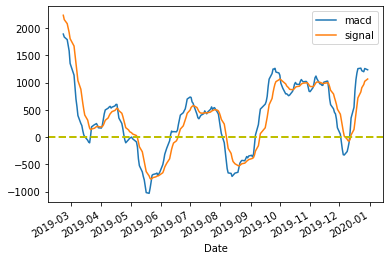

In [109]:
samsung_2019['macd'].plot()
samsung_2019['signal'].plot()
plt.axhline(y=0, color='y', linewidth=2, linestyle='--')
plt.legend()

# macd를 활용한 매매시점 포착
# macd 가 0선을 상향 돌파하면 매수(상승국면), 하향돌파하면 매도(하향 국면)
# macd 가 시그널을 상향돌파(골든크로스)하면 매수, 하향돌파(데드크로스)하면 매도 

# Parabolic SAR(Stop and Reversal)
- 시간과 주가의 움직임을 함수로 하는 반전시스템
- 시간의 경과에 따라 주가의 움직임이 예상과 다르게 나타나면 추세전환의 신호로 인식하고 보유포지션을 중지(Stop)하는 동시에 반대(Reversal)포지션을 취하는 것을 의미 

- 상승추게에서 sar은 주가아래에서 서서히 따라서 올라가다 추세를 따라 가속하는 경향이 이'ㅆ고
하락추세에서는 반대방향으로 똑같이 반응 

# 주가가 SAR 위로 상승하는 시점 : 매수관점
# 주가가 SAR 아래로 하락하는 시점 : 매도 관점

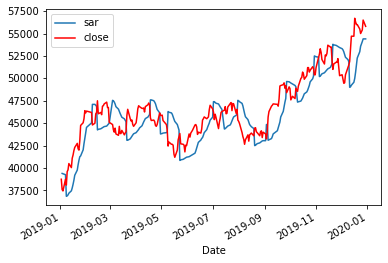

In [113]:
import talib.abstract as td
sar = td.SAR(samsung_2019['high'], samsung_2019['low'], acceleration=0.02, maxmium=0.2)
samsung_2019['sar'] = sar
samsung_2019['sar'].plot()
samsung_2019['close'].plot(color='r', linestyle='-')
plt.legend()
plt.show()

# MFI : money flow index
- 과열과 침체를 보여줌
- 어제보다 오늘 가격이 상승 했다면 얼마나 강하게 상승했는가를 계산한 지표
- 가격의 차이 뿐만 아니라 거래량을 동반하고 있다는점
- 같은 가격폭 변화를 보여주더라도 거래량이 많은 날은 그 강도가 강해지도록 설계되어있음
- 65 이상이면 과열 30 이하면 침체


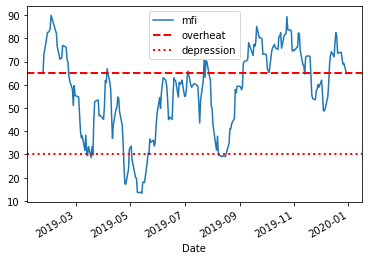

In [118]:
# MFI
samsung_2019['mfi'] = ta.MFI(samsung_2019)
samsung_2019['mfi'].plot()
plt.axhline(label='overheat', y=65, color='r', linewidth=2, linestyle='--')
plt.axhline(label='depression', y=30, color='r', linewidth=2, linestyle=':')
plt.legend()